In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
df = pd.read_csv('data.csv', sep='|')
df.head()

,order_details_id,order_id,order_date,order_time,item_id,item_name,category,price
0,1,1,1/1/23,11:38:36 AM,109,Korean Beef Bowl,Asian,17.95
1,94,38,1/1/23,5:03:00 PM,109,Korean Beef Bowl,Asian,17.95
2,110,45,1/1/23,5:55:48 PM,109,Korean Beef Bowl,Asian,17.95
3,125,52,1/1/23,6:53:02 PM,109,Korean Beef Bowl,Asian,17.95
4,175,76,1/2/23,12:21:17 PM,109,Korean Beef Bowl,Asian,17.95


In [3]:
# drop the order_details_id, order_id
df.drop(['order_details_id', 'order_id'], axis=1, inplace=True)

In [4]:
df.head()

,order_date,order_time,item_id,item_name,category,price
0,1/1/23,11:38:36 AM,109,Korean Beef Bowl,Asian,17.95
1,1/1/23,5:03:00 PM,109,Korean Beef Bowl,Asian,17.95
2,1/1/23,5:55:48 PM,109,Korean Beef Bowl,Asian,17.95
3,1/1/23,6:53:02 PM,109,Korean Beef Bowl,Asian,17.95
4,1/2/23,12:21:17 PM,109,Korean Beef Bowl,Asian,17.95


## Problem statement: Predicting price

In [5]:
# check for missing values
df.isnull().sum()

order_date    0
order_time    0
item_id       0
item_name     0
category      0
price         0
dtype: int64

In [6]:
# check for duplicates
df.duplicated().sum()

307

In [7]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.columns

Index(['order_date', 'order_time', 'item_id', 'item_name', 'category',
       'price'],
      dtype='object')

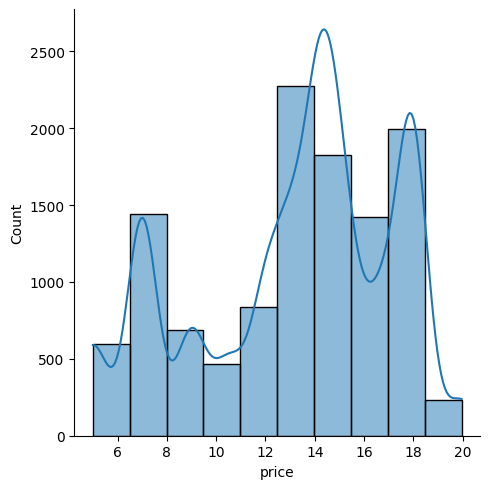

In [9]:
# distribution of price
sns.displot(df['price'], kde=True, bins=10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11790 entries, 0 to 12096
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_date  11790 non-null  object 
 1   order_time  11790 non-null  object 
 2   item_id     11790 non-null  int64  
 3   item_name   11790 non-null  object 
 4   category    11790 non-null  object 
 5   price       11790 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 644.8+ KB


In [15]:
# extract hour of the day from order_time
df['order_time'] = pd.to_datetime(df['order_time'])
df['hour'] = df['order_time'].dt.hour

# extract day of the week from order_date
df['order_date'] = pd.to_datetime(df['order_date'])
df['day'] = df['order_date'].dt.day_name()

In [16]:
df.head()

,order_date,order_time,item_id,item_name,category,price,hour,day
0,2023-01-01,2023-11-29 11:38:36,109,Korean Beef Bowl,Asian,17.95,11,Sunday
1,2023-01-01,2023-11-29 17:03:00,109,Korean Beef Bowl,Asian,17.95,17,Sunday
2,2023-01-01,2023-11-29 17:55:48,109,Korean Beef Bowl,Asian,17.95,17,Sunday
3,2023-01-01,2023-11-29 18:53:02,109,Korean Beef Bowl,Asian,17.95,18,Sunday
4,2023-01-02,2023-11-29 12:21:17,109,Korean Beef Bowl,Asian,17.95,12,Monday


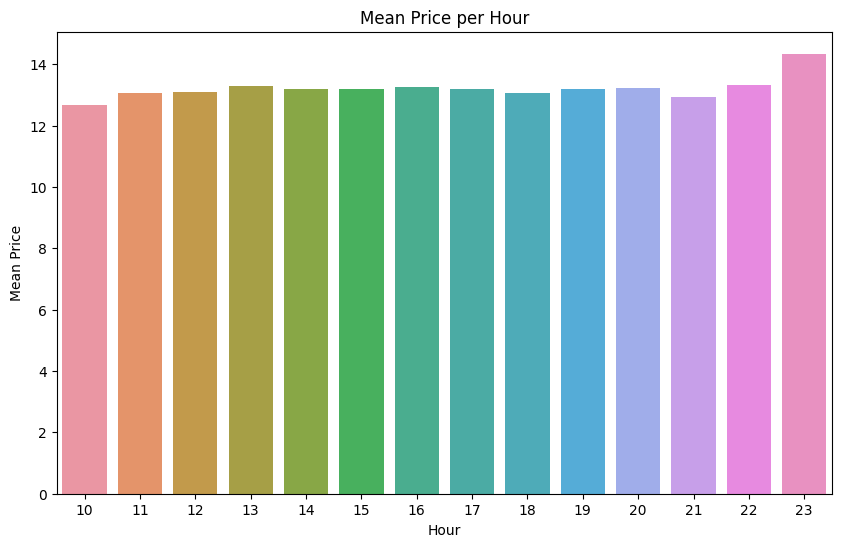

In [14]:
# plot the mean price per hour
plt.figure(figsize=(10, 6))
sns.barplot(x='hour', y='price', data=df, ci=None)
plt.title('Mean Price per Hour')
plt.xlabel('Hour')
plt.ylabel('Mean Price')
plt.show()

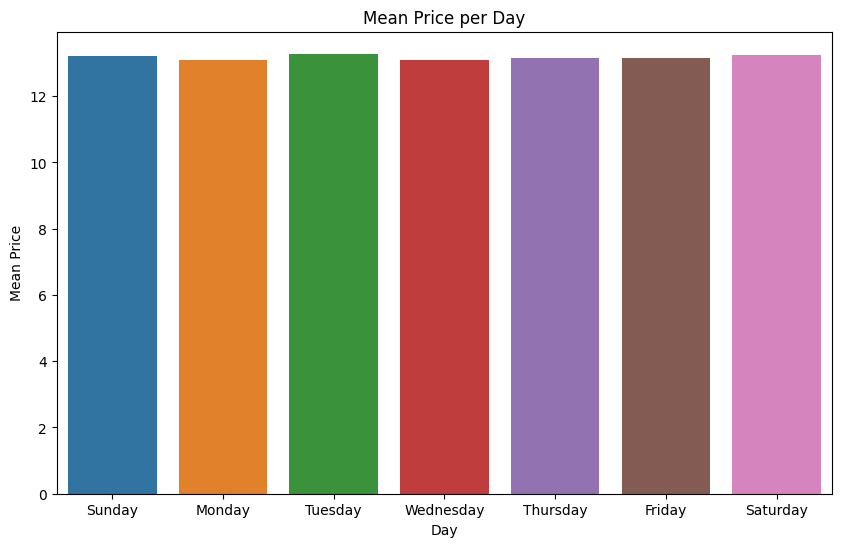

In [17]:
# plot the mean price per day
plt.figure(figsize=(10, 6))
sns.barplot(x='day', y='price', data=df, ci=None)
plt.title('Mean Price per Day')
plt.xlabel('Day')
plt.ylabel('Mean Price')
plt.show()

In [19]:
# define my ml model features
features= ['item_name', 'category', 'hour', 'day']

# split the data into target and features
X = df[features]
y = df['price']

In [21]:
# Encode categorical features using ordinal encoding
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

X = encoder.fit_transform(X)

array([[16.,  1.,  1.,  3.],
       [16.,  1.,  7.,  3.],
       [16.,  1.,  7.,  3.],
       ...,
       [ 6.,  3.,  6.,  4.],
       [ 6.,  3.,  5.,  0.],
       [ 6.,  3.,  7.,  0.]])

In [22]:
# convert X to dataframe
X = pd.DataFrame(X, columns=features)
X.head()

,item_name,category,hour,day
0,16.0,1.0,1.0,3.0
1,16.0,1.0,7.0,3.0
2,16.0,1.0,7.0,3.0
3,16.0,1.0,8.0,3.0
4,16.0,1.0,2.0,1.0


In [23]:
# Fit a random forest regressor
from sklearn.ensemble import RandomForestRegressor

# instantiate the model
rf = RandomForestRegressor()

# fit the model
rf.fit(X, y)

# get the model score
rf.score(X, y)

1.0

In [24]:
X.shape

(11790, 4)

In [25]:
# export our encoding model using pickle
import pickle

pickle.dump(encoder, open('encoder.pkl', 'wb'))

# export our random forest model using pickle
pickle.dump(rf, open('model.pkl', 'wb'))